In [108]:
import pandas as pd
import requests
import json
import time
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [1]:
pip install vaderSentiment

    100% |████████████████████████████████| 133kB 5.5MB/s 
Note: you may need to restart the kernel to use updated packages.


In [109]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [110]:
pwd

'/Users/adamburpee/Capstone/Capstone/code'

In [111]:
df = pd.read_csv('../data/blackops_comments.csv')

In [113]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [114]:
df.drop_duplicates(subset = 'body', inplace = True)

In [115]:
df.shape

(1887120, 6)

In [128]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [129]:
(sentiment_analyzer_scores(df['body'].loc[0]))

{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'compound': -0.3612}

,author,body,created_utc,score,permalink,date
0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01
1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01
2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01
3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01
4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01


In [118]:
sentiment_analyzer_scores('i really like tea!')

({'neg': 0.0, 'neu': 0.393, 'pos': 0.607, 'compound': 0.474},
 'i really like tea!')

In [119]:
sentiment_analyzer_scores('i really like tea')

({'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.4201},
 'i really like tea')

In [120]:
sentiment_analyzer_scores('i like tea')

({'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}, 'i like tea')

In [121]:
sentiment_analyzer_scores('tea')

({'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, 'tea')

In [122]:
sentiment_analyzer_scores(':)')

({'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}, ':)')

In [123]:
sentiment_analyzer_scores(':)  !!!!!')

({'neg': 0.0, 'neu': 0.193, 'pos': 0.807, 'compound': 0.6331}, ':)  !!!!!')

In [12]:
df['neg'] = 0

In [13]:
df['neu'] = 0
df['pos'] = 0
df['compound'] = 0

In [132]:
sentiment_analyzer_scores(df['body'].iloc[0])['neg']

0.263

In [53]:
# df['neg'] = df['body'].apply(lambda x: sentiment_analyzer_scores(str(x))['neg'])

# df['neu'] = df['body'].apply(lambda x: sentiment_analyzer_scores(str(x))['neu'])

# df['pos'] = df['body'].apply(lambda x: sentiment_analyzer_scores(str(x))['pos'])

In [130]:
df['compound'] = df['body'].apply(lambda x: sentiment_analyzer_scores(str(x))['compound'])

In [131]:
len(df)

1887120

In [133]:
df.head()

,author,body,created_utc,score,permalink,date,compound
0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612
1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960
2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215
3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767
4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258


In [134]:
df['compound'].idxmax()

992504

In [135]:
df.loc[df['compound'].idxmax()]['body']

'Play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play play

In [76]:
df['author'].nunique()

148053

In [101]:
import datetime
utc_datetime = datetime.datetime.utcnow()
utc_datetime.strftime("%Y-%m-%d %H:%M:%S")

'2019-05-06 01:22:39'

In [104]:
utc_datetime.strftime(df['created_utc'].loc[0])

'Wed May  1 23:55:11 2019'

In [136]:
df.dtypes

author          object
body            object
created_utc      int64
score            int64
permalink       object
date            object
compound       float64
dtype: object

In [137]:
df.score.max()

10509

In [138]:
df.score.min()

-570

In [140]:
df.permalink.loc[1]

'/r/Blackops4/comments/bjnzy5/this_is_so_damn_satisying/em9spes/'

In [141]:
len('/r/Blackops4/comments/bjnzy5/')#this_is_so_damn_satisying/em9spes/

29

In [142]:
len('/em9spes/')

9

In [143]:
string = '/r/Blackops4/comments/bjnzy5/this_is_so_damn_satisying/em9spes/'

In [144]:
df['title'] = df.permalink.apply(lambda x: x[29:-9])

In [145]:
df.head()

,author,body,created_utc,score,permalink,date,compound,title
0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes
1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying
2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying
3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i
4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead


In [61]:
string[:-9]

'/r/Blackops4/comments/bjnzy5/this_is_so_damn_satisying'

In [62]:
df['body'] = df['body'].apply(lambda x: re.sub('([^a-zA-Z ])', ' ', str(x)))

In [63]:
df.head()

,author,body,created_utc,score,permalink,title
0,Pikachu-Faroo,So they re just gonna ignore the Sparrow bug,Wed May 1 23:55:11 2019,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,may_1st_update_gameplay_improvements_bug_fixes
1,Only-One-Gender,Yeah I m getting them,Wed May 1 23:54:46 2019,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,this_is_so_damn_satisying
2,twopumpstump,So you are getting the new stuff I heard the ...,Wed May 1 23:54:20 2019,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,this_is_so_damn_satisying
3,MoneyMajesty,Was just about to say this The sad thing abou...,Wed May 1 23:53:45 2019,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,if_only_treyarchacti_would_follow_suit_but_i
4,Slaya420D,claims the game is dead I can find a lobby ...,Wed May 1 23:53:41 2019,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,seriously_this_game_is_dead


In [146]:
df.index = range(len(df.index))

In [147]:
df['body'].loc[5]

"I've no idea about that but me and my buddy keep getting into a party and I get kicked from the game for lacking the maps."

In [148]:
df['character_count'] = df['body'].str.len()

In [149]:
df.head()

,author,body,created_utc,score,permalink,date,compound,title,character_count
0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes,45.0
1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying,21.0
2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying,106.0
3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i,82.0
4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead,69.0


In [150]:
df['word_count'] = df['body'].map(lambda x: len(str(x).split()))

In [151]:
df.head()

,author,body,created_utc,score,permalink,date,compound,title,character_count,word_count
0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes,45.0,8
1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying,21.0,4
2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying,106.0,22
3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i,82.0,18
4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead,69.0,15


In [152]:
df.character_count.mean()

137.51235083744055

In [153]:
df.character_count.max()

26782.0

In [154]:
df.character_count.idxmax()

1067694

In [155]:
df.body.loc[1067694]

'Infinite Warfare &gt; Treyarch &gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;&gt;

In [156]:
df.drop(1067694, axis = 0, inplace = True)

In [157]:
df.character_count.idxmax()

1392351

In [158]:
df.body.loc[1392351]

"I'll try to give /u/TreyarchPC some helpful feedback here from my POV as someone who plays this game on PC everyday.\n\nThe first issue alot of people have here is the reposting of the console patch notes instead of issuing a specific PC related set of notes. If the reason for this is that the patch itself is identical then this makes sense, however it does not fix the core issue. \n\nAs you guys know the PC and Console meta games are widly different when it comes to the positioning of each gun in players personal rankings in terms of balance, knowing this and assuming that this PC patch is identical to the console patch excluding some PC bug fixes, wouldn't it be better to simply wait until you had a PC specific balance patch to roll out before doing any balancing on PC instead of forcing a patch onto the platform which works somewhat in opposite to the meta on that platform? As it stands alot of PC players myself to a lesser extent included are furstrated that this patch was pushed 

In [159]:
df.character_count.idxmin()

952

In [160]:
df['body'].loc[952]

'W'

In [161]:
df = df[df['character_count'] > 10]

In [162]:
df.shape

(1848889, 10)

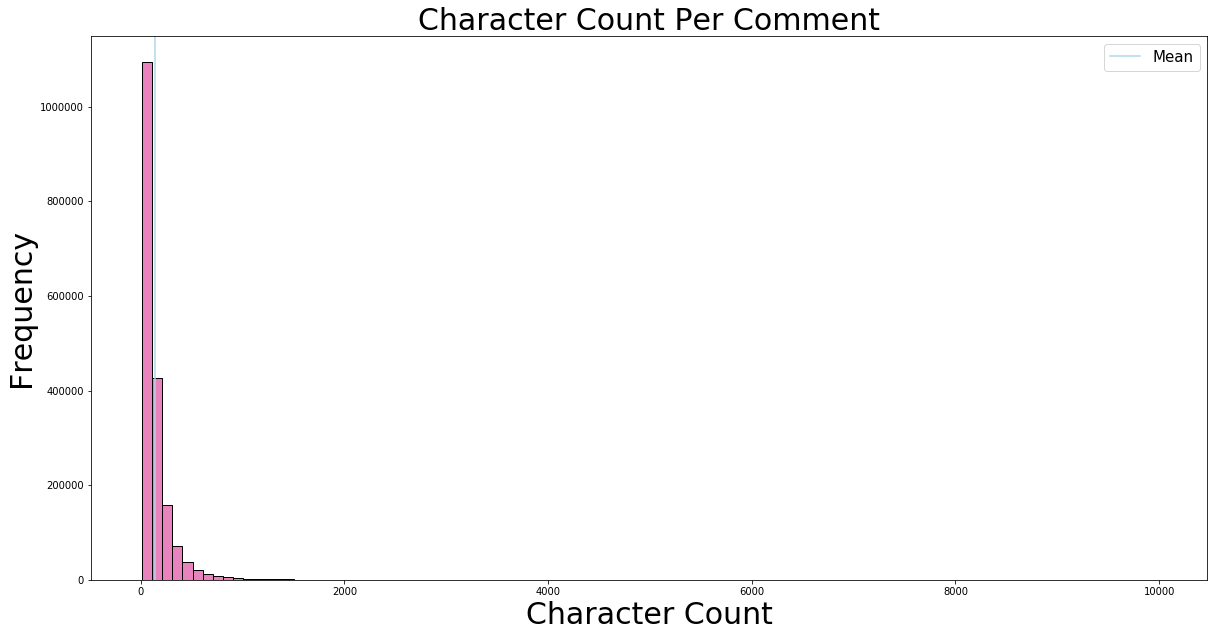

In [163]:
plt.figure(figsize=(20,10))
plt.hist(df['character_count'], 
#                df[df['subreddit']==1]['title_length']],
         bins=100, 
         color=['#E983BD'], 
         ec='k')
# plt.hist([df[df['subreddit']==0]['title_length'], 
#                df[df['subreddit']==1]['title_length']],
#                bins=15, 
#                color=['#23E9E3', '#EF9E35'], 
#                ec='#23E9E3')
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Character Count', fontsize = 30)
plt.axvline(df['character_count'].mean(), color = 'lightblue')
# plt.axvline(df[df['subreddit']==1]['title_length'].mean(), color = 'blue')
plt.title('Character Count Per Comment', fontsize=30)
plt.legend(['Mean'], fontsize = 15)
# plt.xticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280]);

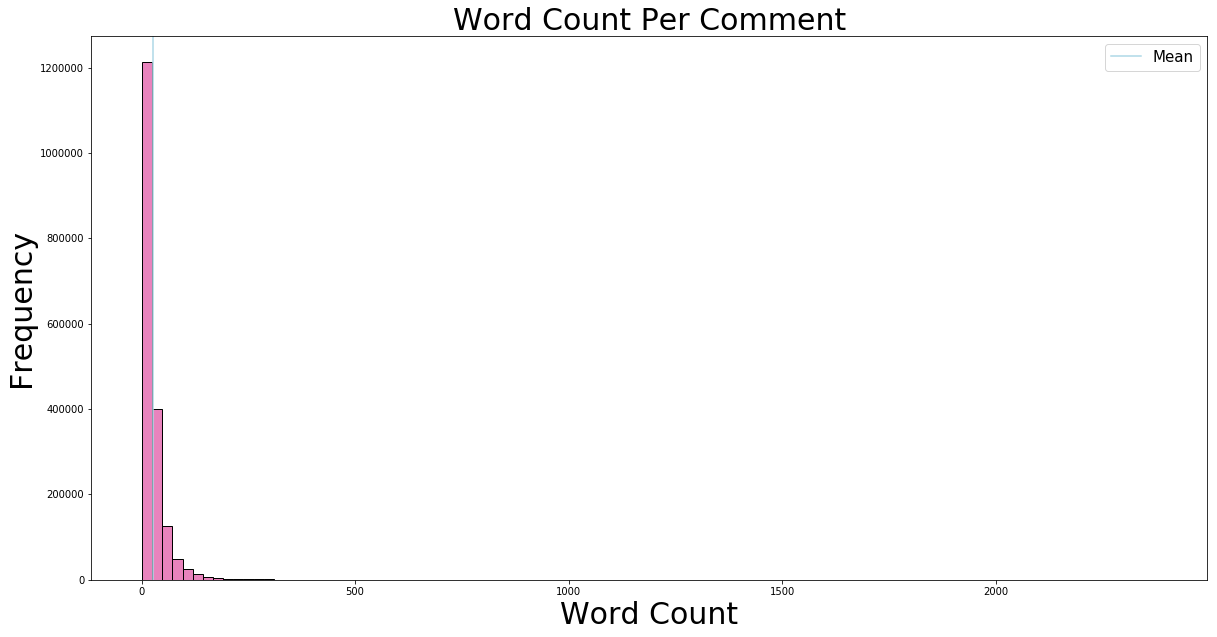

In [164]:
plt.figure(figsize=(20,10))
plt.hist(df['word_count'], 
#                df[df['subreddit']==1]['title_length']],
         bins=100, 
         color=['#E983BD'], 
         ec='k')
# plt.hist([df[df['subreddit']==0]['title_length'], 
#                df[df['subreddit']==1]['title_length']],
#                bins=15, 
#                color=['#23E9E3', '#EF9E35'], 
#                ec='#23E9E3')
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Word Count', fontsize = 30)
plt.axvline(df['word_count'].mean(), color = 'lightblue')
# plt.axvline(df[df['subreddit']==1]['title_length'].mean(), color = 'blue')
plt.title('Word Count Per Comment', fontsize=30)
plt.legend(['Mean'], fontsize = 15)
# plt.xticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280]);

In [83]:
df.body = df.body.str.lower()

In [171]:
df['body'] = str(df['body'])

In [174]:
df.head()

,author,body,created_utc,score,permalink,date,compound,title,character_count,word_count
0,Pikachu-Faroo,0 So they're just gonna ignore th...,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes,45.0,8
1,Only-One-Gender,0 So they're just gonna ignore th...,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying,21.0,4
2,twopumpstump,0 So they're just gonna ignore th...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying,106.0,22
3,MoneyMajesty,0 So they're just gonna ignore th...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i,82.0,18
4,Slaya420D,0 So they're just gonna ignore th...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead,69.0,15


In [178]:
df['body'].loc[10]

'WW2 had 12 dlc maps too\n\nI enjoy WMD, and don’t mind “too much” that’s it’s bopass exclusive, other than the fact I need people who have it if I want to party up and play'

In [179]:
df['body'] = df['body'].apply(lambda x: re.sub(r"(http\S+)|(\/u\/\S+)|(r\/\S+)|(\\n\S+)|(\^\S+)|(\&amp\S+)|(nbsp\S+)", 
                                               " ", 
                                               x))

In [165]:
df.to_csv('../data/bo_four_wc_cc_sentiment.csv')

In [175]:
df = pd.read_csv('../data/bo_four_wc_cc_sentiment.csv')

In [176]:
df.head()

,Unnamed: 0,author,body,created_utc,score,permalink,date,compound,title,character_count,word_count
0,0,Pikachu-Faroo,So they're just gonna ignore the Sparrow bug?,1556754911,1,/r/Blackops4/comments/bjn8sm/may_1st_update_ga...,2019-05-01,-0.3612,may_1st_update_gameplay_improvements_bug_fixes,45.0,8
1,1,Only-One-Gender,Yeah I'm getting them,1556754886,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.2960,this_is_so_damn_satisying,21.0,4
2,2,twopumpstump,So you are getting the new stuff? I heard the ...,1556754860,1,/r/Blackops4/comments/bjnzy5/this_is_so_damn_s...,2019-05-01,0.4215,this_is_so_damn_satisying,106.0,22
3,3,MoneyMajesty,Was just about to say this. The sad thing abou...,1556754825,1,/r/Blackops4/comments/bjnygs/if_only_treyarcha...,2019-05-01,-0.4767,if_only_treyarchacti_would_follow_suit_but_i,82.0,18
4,4,Slaya420D,*claims the game is dead*\n\nI can find a lobb...,1556754821,1,/r/Blackops4/comments/bjo9k6/seriously_this_ga...,2019-05-01,0.0258,seriously_this_game_is_dead,69.0,15


In [235]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [236]:
cvec = CountVectorizer(ngram_range = (1,1), stop_words = 'english')

In [237]:
X = bo_four['body']

In [238]:
cvec.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [239]:
X_cvec = cvec.transform(X)

In [247]:
cvec.get_feature_names()[500:550]

['abilitiesid',
 'abilitiesif',
 'abilitiesim',
 'abilitiesimagine',
 'abilitiesin',
 'abilitiesit',
 'abilitiesitems',
 'abilitiesitemsddowndup',
 'abilitiesjust',
 'abilitieskilling',
 'abilitieslike',
 'abilitiesmaybe',
 'abilitiesmeanwhile',
 'abilitiesmm',
 'abilitiesmoreso',
 'abilitiesmost',
 'abilitiesobviously',
 'abilitiesof',
 'abilitiesoh',
 'abilitiesoverrated',
 'abilitiespeople',
 'abilitiesperks',
 'abilitiesperksvehicles',
 'abilitiesplaystyle',
 'abilitiespointless',
 'abilitiespowers',
 'abilitiesps',
 'abilitiespsi',
 'abilitiespulling',
 'abilitiesregardless',
 'abilitiesreproduction',
 'abilitiesruin',
 'abilitiesscorestreaks',
 'abilitiesscroestreaks',
 'abilitiesshrugs',
 'abilitiessiege',
 'abilitiesskills',
 'abilitiesspecialist',
 'abilitiesspoken',
 'abilitiesstanding',
 'abilitiesstick',
 'abilitiesstill',
 'abilitiesstim',
 'abilitiesstreaks',
 'abilitiesstrong',
 'abilitiessure',
 'abilitiesthat',
 'abilitiesthats',
 'abilitiesthe',
 'abilitiesthen']

In [ ]:
most_common_words = pd.DataFrame(X_cvec.toarray(), 
                                 columns = X_cvec.get_feature_names()).sum().sort_values(ascending = False)